In [48]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn import tree

In [19]:
loan_train = pd.read_csv(r'../project/archive/loan_train_sampled.csv')
loan_test = pd.read_csv(r'../project/archive/loan_test.csv')

In [20]:
print("Shape of the training data frame :",loan_train.shape)
print("===================================================")
print("Information about the training data frame :",loan_train.info())
print("===================================================")
print("The data types of columns of training data frame",loan_train.dtypes)

Shape of the training data frame : (16780, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16780 entries, 0 to 16779
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   16780 non-null  int64  
 1   funded_amnt                 16780 non-null  int64  
 2   funded_amnt_inv             16780 non-null  float64
 3   term                        16780 non-null  object 
 4   int_rate                    16780 non-null  float64
 5   grade                       16780 non-null  object 
 6   sub_grade                   16780 non-null  object 
 7   emp_length                  16780 non-null  int64  
 8   home_ownership              16780 non-null  object 
 9   annual_inc                  16780 non-null  float64
 10  verification_status         16780 non-null  object 
 11  issue_d                     16780 non-null  object 
 12  purpose                     16780 non-nul

In [80]:
print(X_train)

       loan_amnt  funded_amnt  funded_amnt_inv  term   int_rate  grade  \
0           6000         6000      6000.000000     1  10.590000      1   
1          14000        14000     13991.397460     1  19.820000      2   
2          15000        15000     14700.000000     1  11.140000      1   
3           8000         8000      7775.000000     1   7.140000      3   
4          20500        12625     12625.000000     2  20.890000      4   
...          ...          ...              ...   ...        ...    ...   
16775      20000        20000     19996.468624     2  13.735784      7   
16776      10000        10000      9981.689164     2  15.576338      7   
16777       7473         7473      7286.451890     1   8.832871      7   
16778      23111        23111     18020.132466     2  16.781994      7   
16779      20000        20000     19975.000000     2  15.328376      7   

       sub_grade  emp_length  home_ownership     annual_inc  ...  \
0              1          10               

In [21]:
print("Shape of the testing data frame :",loan_test.shape)
print("===================================================")
print("Information about the testing data frame :",loan_test.info())
print("===================================================")
print("The data types of columns of testing data frame",loan_test.dtypes)

Shape of the testing data frame : (6609, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6609 entries, 0 to 6608
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   6609 non-null   int64  
 1   funded_amnt                 6609 non-null   int64  
 2   funded_amnt_inv             6609 non-null   float64
 3   term                        6609 non-null   object 
 4   int_rate                    6609 non-null   float64
 5   grade                       6609 non-null   object 
 6   sub_grade                   6609 non-null   object 
 7   emp_length                  6609 non-null   int64  
 8   home_ownership              6609 non-null   object 
 9   annual_inc                  6609 non-null   float64
 10  verification_status         6609 non-null   object 
 11  issue_d                     6609 non-null   object 
 12  purpose                     6609 non-null   o

In [23]:
y_train = loan_train['loan_status']
X_train = loan_train.loc[:, loan_train.columns != 'loan_status']

y_test = loan_test['loan_status']
X_test = loan_test.loc[:, loan_test.columns != 'loan_status']

categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()

encoder = ce.OrdinalEncoder(cols=categorical_columns)
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

features = X_train.columns.tolist()

In [24]:
print("Training Data Size: ",len(X_train),", Testing Data Size: ",len(X_test))
print("======================================")
print("Percentage of Training Data: ",(len(X_train)*100)/(len(X_train)+len(X_test)),", Percentage of Testing Data: ",(len(X_test)*100)/(len(X_train)+len(X_test)))

Training Data Size:  16780 , Testing Data Size:  6609
Percentage of Training Data:  71.74312711103511 , Percentage of Testing Data:  28.2568728889649


### Decision Tree (Supervised Learning)

In [70]:
clf_en = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth = 3)
clf_en.fit(X_train, y_train)

y_pred_en = clf_en.predict(X_test)

### Decision Tree Represetation

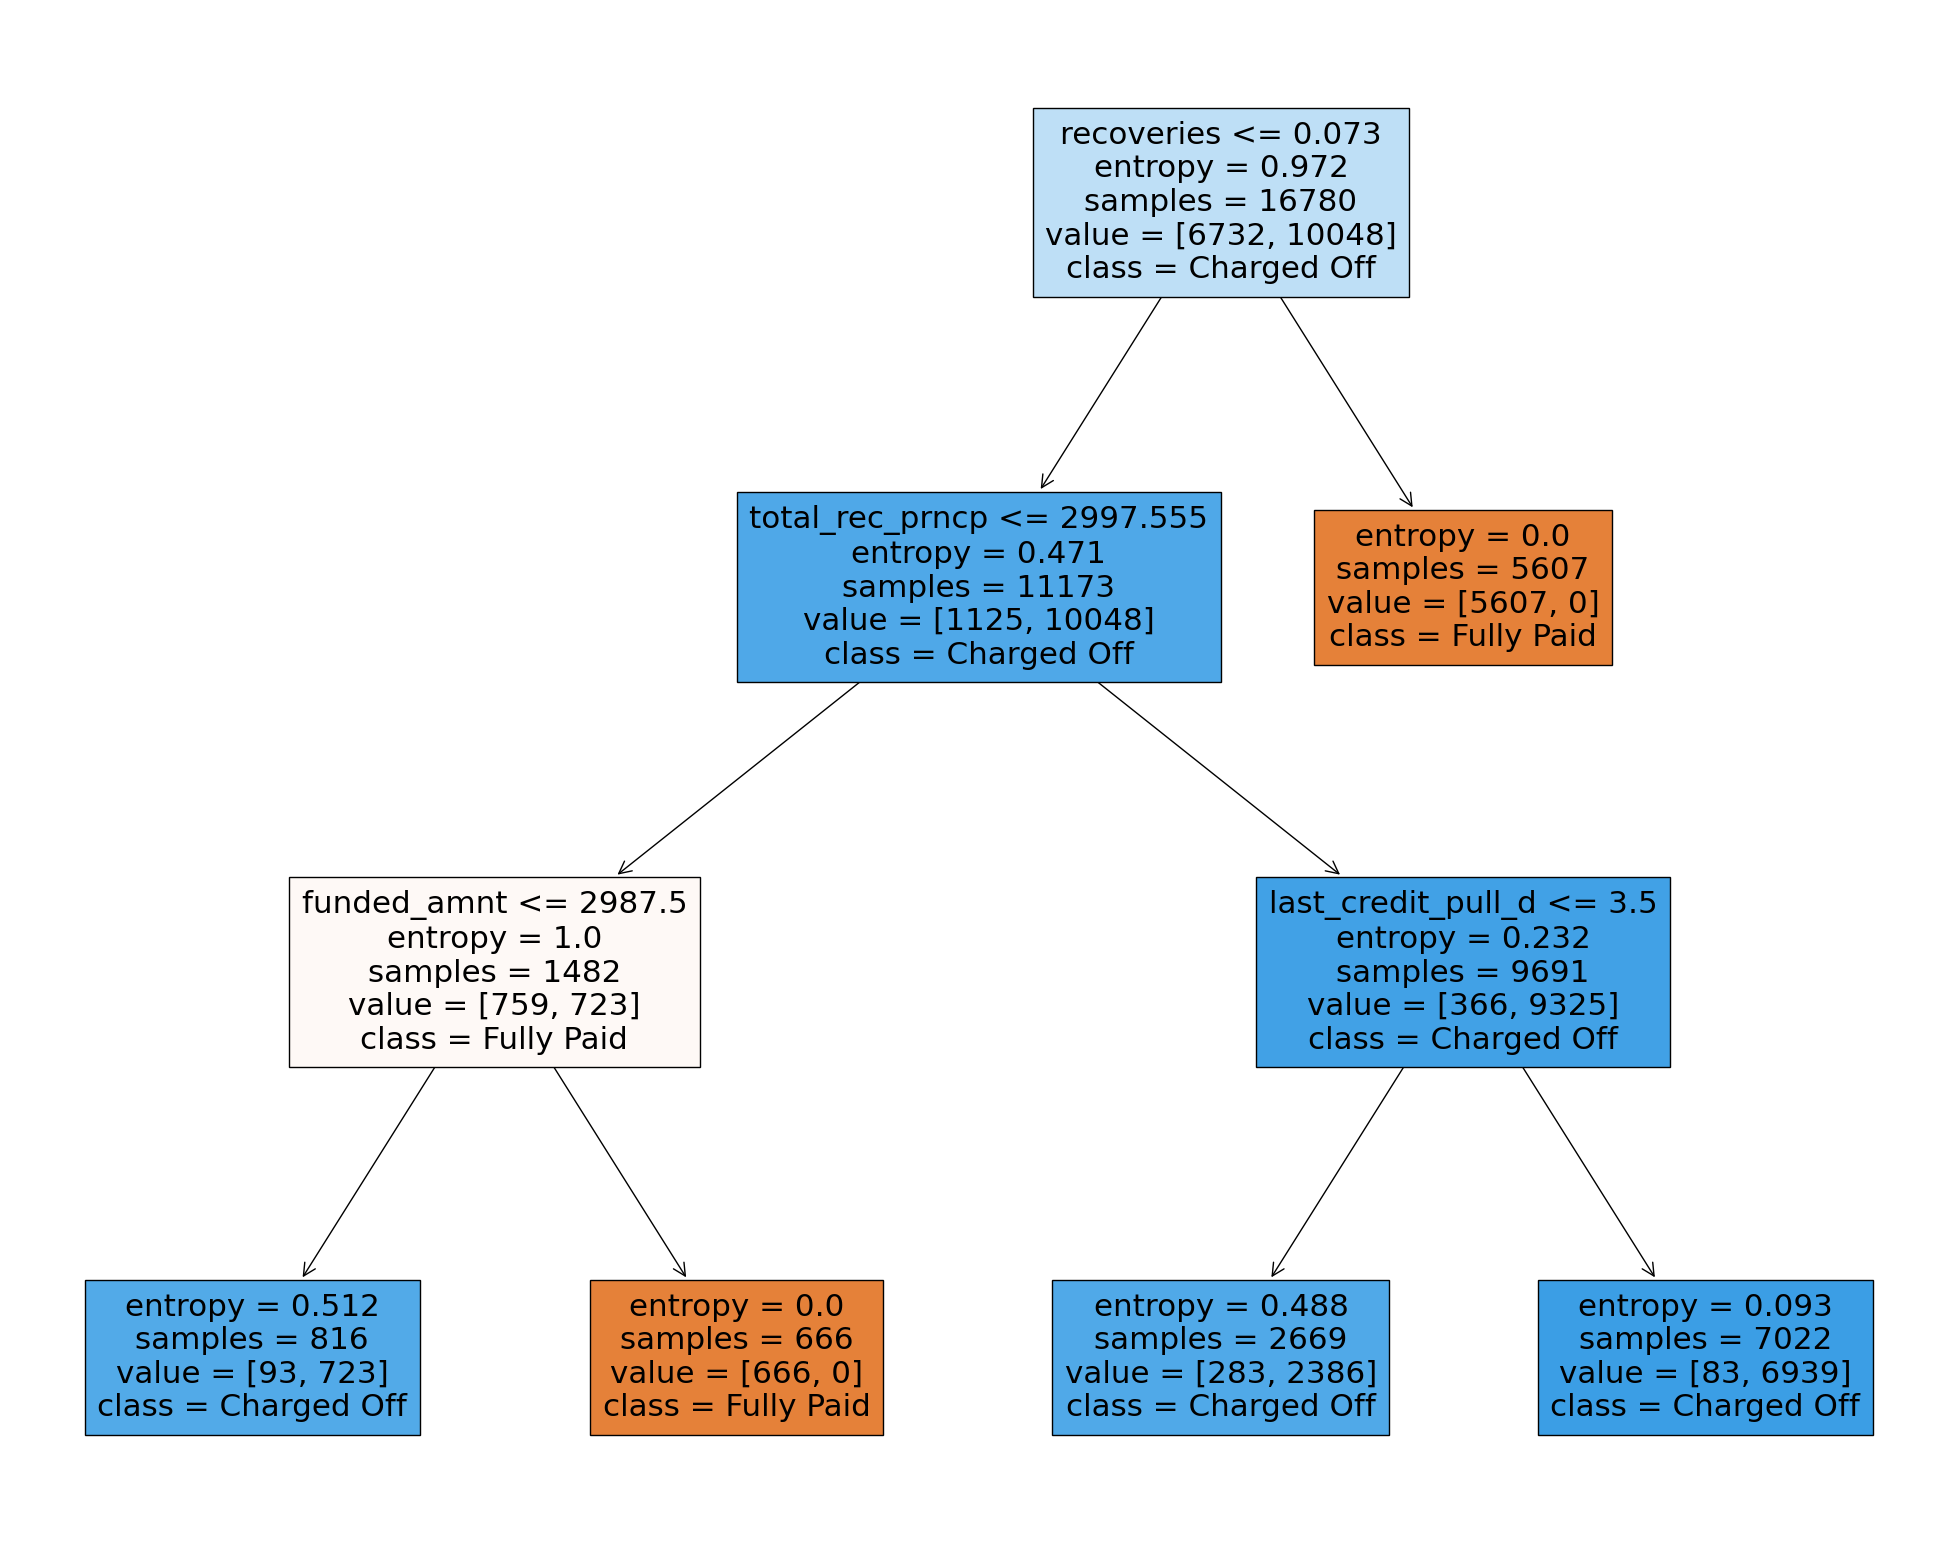

In [71]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_en, 
                   feature_names=features,  
                   class_names=y_train.unique(),
                   filled=True)

In [72]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [73]:
y_train_pred_en = clf_en.predict(X_train)

### Training Data Performance

In [74]:
print("====== Training Data Confusion Matrix ======")
print(confusion_matrix(y_train, y_train_pred_en))

====== Training Data Confusion Matrix ======
[[ 6273   459]
 [    0 10048]]


In [75]:
print("====== Training Data Classification Report ======")
print(classification_report(y_train, y_train_pred_en))

====== Training Data Classification Report ======
              precision    recall  f1-score   support

 Charged Off       1.00      0.93      0.96      6732
  Fully Paid       0.96      1.00      0.98     10048

    accuracy                           0.97     16780
   macro avg       0.98      0.97      0.97     16780
weighted avg       0.97      0.97      0.97     16780



### Testing Data Performance

In [76]:
print("====== Testing Data Confusion Matrix ======")
print(confusion_matrix(y_test, y_pred_en))

====== Testing Data Confusion Matrix ======
[[1460  173]
 [   0 4976]]


In [77]:
print("====== Testing Data Classification Report ======")
print(classification_report(y_test, y_pred_en))

====== Testing Data Classification Report ======
              precision    recall  f1-score   support

 Charged Off       1.00      0.89      0.94      1633
  Fully Paid       0.97      1.00      0.98      4976

    accuracy                           0.97      6609
   macro avg       0.98      0.95      0.96      6609
weighted avg       0.97      0.97      0.97      6609



### Feature importance

In [78]:
importance = clf_en.feature_importances_
for i,v in enumerate(importance):
 print(features[i],':', v)

loan_amnt : 0.0
funded_amnt : 0.07634213445660422
funded_amnt_inv : 0.0
term : 0.0
int_rate : 0.0
grade : 0.0
sub_grade : 0.0
emp_length : 0.0
home_ownership : 0.0
annual_inc : 0.0
verification_status : 0.0
issue_d : 0.0
purpose : 0.0
title : 0.0
addr_state : 0.0
dti : 0.0
delinq_2yrs : 0.0
earliest_cr_line : 0.0
inq_last_6mths : 0.0
open_acc : 0.0
pub_rec : 0.0
revol_bal : 0.0
revol_util : 0.0
total_acc : 0.0
out_prncp : 0.0
out_prncp_inv : 0.0
total_pymnt : 0.0
total_pymnt_inv : 0.0
total_rec_prncp : 0.1101739148658448
total_rec_int : 0.0
total_rec_late_fee : 0.0
recoveries : 0.7922813372734198
collection_recovery_fee : 0.0
last_pymnt_d : 0.0
last_pymnt_amnt : 0.0
last_credit_pull_d : 0.021202613404131227
collections_12_mths_ex_med : 0.0
pub_rec_bankruptcies : 0.0


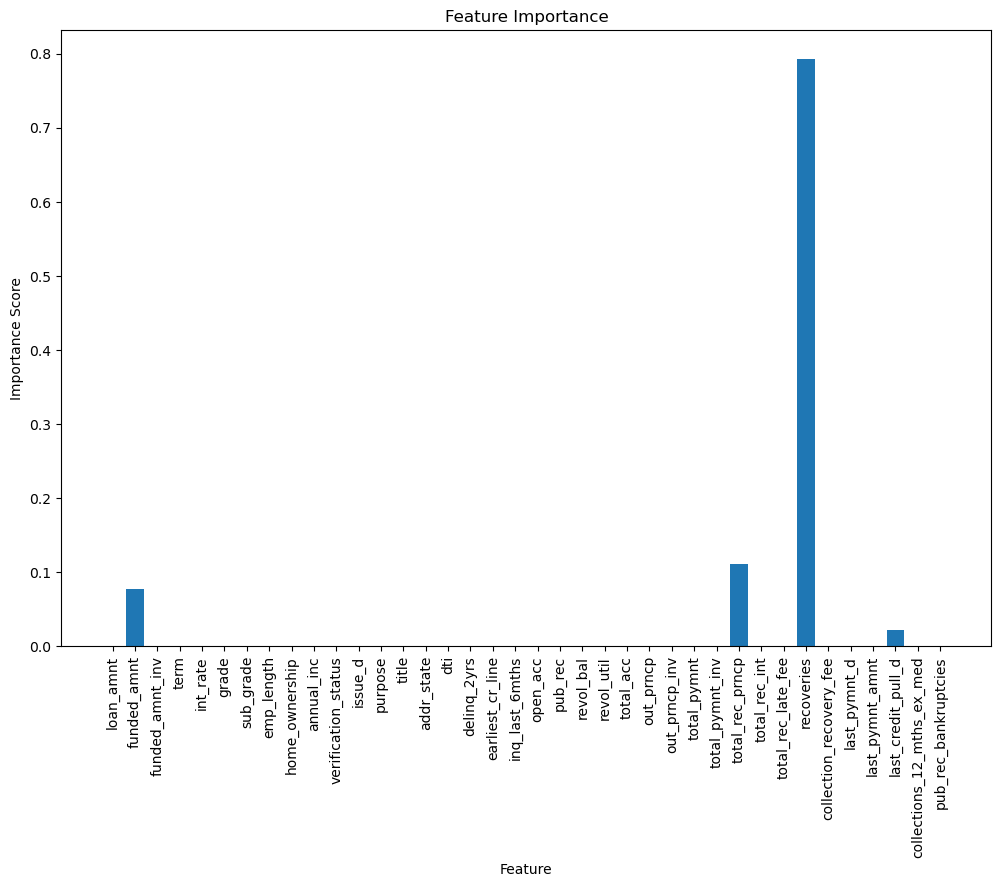

In [79]:
# plot feature importance
plt.figure(figsize=(12,8))
plt.bar(features, importance)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.show()